In [133]:
import numpy as np
import numpy.ma as ma
from astropy.io import ascii
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from astroML.stats import binned_statistic_2d
import seaborn as sns
#from scipy.stats import gaussian_kde
%matplotlib inline

sns.set(style='white', font_scale=1.6, palette='deep')

In [153]:
# Read the full catalog
dat = ascii.read('dr2-grz.txt', format='fixed_width', delimiter='|', data_start=2)#, data_end=10000)
dat

id,ra,dec,gflux,rflux,zflux,gflux_ivar,rflux_ivar,zflux_ivar
str11,str17,float64,float64,float64,float64,float64,float64,float64
3281870,35.563262479,-5.07592365632,53.7093,146.618,280.668,48.3062,42.9506,16.8985
3282026,35.5448541701,-5.06650704523,1.79172,7.6698,27.6593,185.748,154.071,54.2688
3282033,35.5574103117,-5.06563443237,2.77672,4.34068,5.83656,181.597,159.672,56.8928
3282040,35.5344433281,-5.06482205103,5.09679,22.5321,110.0,169.803,110.534,46.4268
3282054,35.577066248,-5.06338030818,37.4618,80.7769,143.244,62.767,60.7404,21.8262
3282181,35.5557897738,-5.05748778117,2.72855,7.02151,10.256,95.433,86.7176,27.0506
3282218,35.5891039988,-5.05135694789,29.8576,78.8151,171.006,59.502,53.4583,19.385
3282227,35.5921434121,-5.05423069016,1.68402,6.85678,15.8476,173.971,147.294,50.8141
3282271,35.5878112882,-5.05266711055,3.45382,9.99038,19.8505,165.662,142.184,50.3153


In [154]:
# Do some juggling to deal with masked values and then define the g-r and r-z colors.
dat['gflux'].fill_value = -99
dat['rflux'].fill_value = -99
dat['zflux'].fill_value = -99
good = np.where((dat['gflux']>0)*(dat['rflux']>0)*(dat['zflux']>0)*1)[0]
gr = -2.5*np.log10(np.array(dat['gflux'][good]/dat['rflux'][good]))
rz = -2.5*np.log10(np.array(dat['rflux'][good]/dat['zflux'][good]))

In [167]:
# Make a fancy histogram - http://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html
xlim = (-0.7, 2.0)
ylim = (-0.7, 2.0)
N, xedges, yedges = binned_statistic_2d(rz, gr, gr, 'count', 
                                        bins=100, range=[xlim, ylim])
N[N<20] = 0
# Define custom colormaps: Set pixels with no sources to white
cmap = cm.jet
cmap.set_bad('w', 1.)
cmap_multicolor = cm.jet
cmap_multicolor.set_bad('w', 1.)

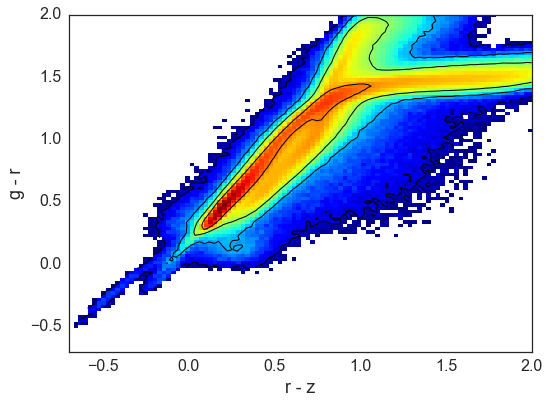

In [169]:
# Make a plot
fig, ax = plt.subplots(1, 1, figsize=(8,6))
#ax.scatter(rz, gr, c=nn, s=50, edgecolor='', cmap=cm.Blues)
#sns.kdeplot(rz, gr, clip=(xlim, ylim), ax=ax, gridsize=40,
#           cmap="Reds", shade=True, cut=0, shade_lowest=False)
#ax.scatter(gr[:100], rz[:100], marker='s')
ax.imshow(np.log10(N.T), origin='lower', 
          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          aspect='auto', interpolation='nearest', cmap=cmap)
levels = np.linspace(0, np.log10(N.max()), 7)[2:]
plt.contour(np.log10(N.T), levels, colors='k', linewidths=1,
            extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])
#ax.set_xlim(xlim)
#ax.set_ylim(ylim)
ax.set_xlabel('r - z')
ax.set_ylabel('g - r')
plt.tight_layout()
plt.show()       

In [ ]:
# Some test code
grz = np.vstack([rz,gr])
nn = gaussian_kde(grz)(grz)

# Sort the points by density, so that the densest points are plotted last
srt = nn.argsort()
rz, gr, nn = rz[srt], gr[srt], nn[srt]